In [1]:
#https://analyticsindiamag.com/hands-on-guide-to-albumentation/
import numpy as np
import pandas as pd
import cv2
import random
import matplotlib.pyplot as plt
import albumentations as A

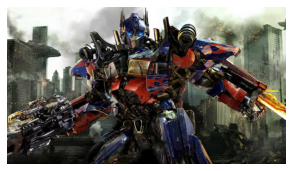

In [3]:
def view_transform(image):
  plt.figure(figsize=(5,5))
  plt.axis('off')
  plt.imshow(image)

figure = cv2.imread('Transformers.jpg')
figure = cv2.cvtColor(figure, cv2.COLOR_BGR2RGB)
view_transform(figure)

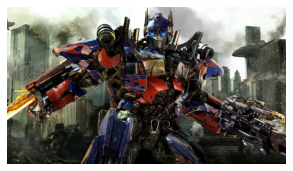

In [4]:
transform = A.HorizontalFlip(p=0.5)
random.seed(7)
augmented_image = transform(image=figure)['image']
view_transform(augmented_image)

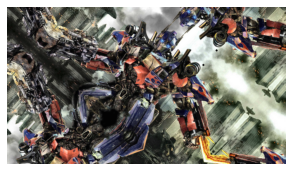

In [5]:
transform = A.Compose([
    A.CLAHE(),
    A.RandomRotate90(),
    A.Transpose(),
    A.Cutout(num_holes=1, max_h_size=16,max_w_size = 16,p=1),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50, rotate_limit=45, p=.75),
    A.Blur(blur_limit=3),
    A.OpticalDistortion(),
])
random.seed(42) 
augmented_image = transform(image=figure)['image']
view_transform(augmented_image)

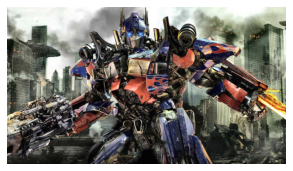

In [6]:
transform = A.Compose([
        A.RandomRotate90(),
        A.Flip(),
        A.Transpose(),
        A.OneOf([
            A.MotionBlur(p=.2),
            A.MedianBlur(blur_limit=3, p=0.3),
            A.Blur(blur_limit=3, p=0.1),
        ], p=0.2),
        A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.2),
        A.OneOf([
            A.OpticalDistortion(p=0.3),
            A.GridDistortion(p=.1),
        ], p=0.2),
        A.OneOf([
            A.CLAHE(clip_limit=2),
            A.RandomBrightnessContrast(),            
        ], p=0.3),
        A.HueSaturationValue(p=0.3),
    ])
random.seed(42) 
augmented_image = transform(image=figure)['image']
view_transform(augmented_image)